In [31]:
from index_mapping import load_mapping, matrix_index_to_root_id

mapping = load_mapping('root_id_to_index_mapping.json')
rootid_mapping = dict((v, k) for k, v in mapping.items())

In [32]:
import gzip

name_mapping = dict()

with gzip.open('./names.csv.gz', 'rt') as f:
    f.readline()
    for line in f:
        root_id, name, group = line.strip().split(',')
        root_id = int(root_id)
        name_mapping[root_id] = name

In [33]:
import numpy as np 

cluster_assignments = np.load('cluster_assignments.npy')

In [34]:
# go through each cluster, 
# fine all root_id's within that cluster,
# convert each root_id to its name,
# and list them.
clusters = np.unique(cluster_assignments)

for cluster in clusters:
    print(f'Cluster {cluster}')
    cluster_indices = np.where(cluster_assignments == cluster)[0]
    cluster_root_ids = [matrix_index_to_root_id(i, mapping) for i in cluster_indices]
    cluster_names = [name_mapping[root_id] for root_id in cluster_root_ids]
    # sort by name
    cluster_names.sort()
    print(", ".join(cluster_names))

Cluster 0
AL.1008, AL.1031, AL.1101, AL.1194, AL.1216, AL.1238, AL.1281, AL.1308, AL.1359, AL.1386, AL.1393, AL.1459, AL.1542, AL.1665, AL.1693, AL.1726, AL.1729, AL.1914, AL.1967, AL.1970, AL.2036, AL.2050, AL.2131, AL.2383, AL.242, AL.2432, AL.255, AL.2673, AL.341, AL.414, AL.434, AL.558, AL.727, AL.743, AL.76, AL.768, AL.811, AL.82, AL.837, AL.881, AL.89, AL.894, AL.900, AL.972, AL.998, AL.LH.12, AL.LH.123, AL.LH.137, AL.LH.152, AL.LH.18, AL.LH.282, AL.LH.7, AL.PLP.13, AL.PLP.27, AME.14, AMMC.158, AMMC.228, AMMC.230, AMMC.342, AMMC.SAD.42, AMMC.SPS.2, AOTU.162, AOTU.173, AOTU.225, AOTU.270, AOTU.307, AOTU.340, AOTU.369, AOTU.388, AOTU.391, AOTU.82, AOTU.LAL.10, ATL.CRE.4, ATL.SMP.1, AVLP.1054, AVLP.108, AVLP.1300, AVLP.1316, AVLP.1412, AVLP.1520, AVLP.1546, AVLP.1552, AVLP.1553, AVLP.1572, AVLP.1646, AVLP.1723, AVLP.1734, AVLP.1902, AVLP.1914, AVLP.2007, AVLP.2106, AVLP.2108, AVLP.2148, AVLP.2251, AVLP.2331, AVLP.2381, AVLP.2388, AVLP.2402, AVLP.2407, AVLP.2426, AVLP.2427, AVLP.2429

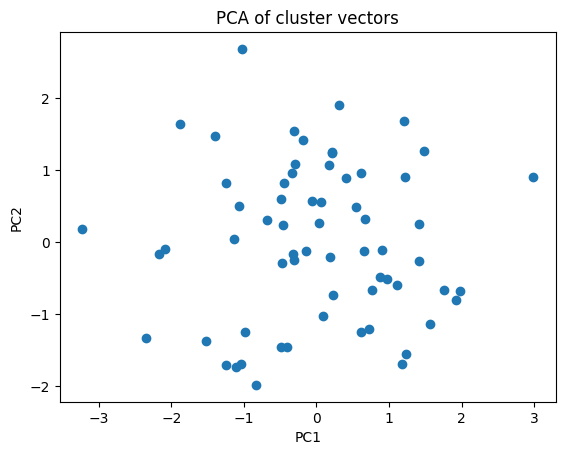

In [35]:
# load the cluster vectors from `U_posterior_mean.npy`
# run PCA on the cluster vectors
# plot the first two principal components
# color by cluster
# label by cluster

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

U_posterior_mean = np.load('U_left_posterior_mean.npy')
pca = PCA(n_components=2)
pca.fit(U_posterior_mean)

U_pca = pca.transform(U_posterior_mean)

plt.scatter(U_pca[:, 0], U_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of cluster vectors')
plt.show()

In [ ]:
# load the cluster vectors from `U_posterior_mean.npy`
# run PCA on the cluster vectors
# plot the first two principal components
# color by cluster
# label by cluster

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

U_posterior_mean = np.load('U_right_posterior_mean.npy')
pca = PCA(n_components=2)
pca.fit(U_posterior_mean)

U_pca = pca.transform(U_posterior_mean)

plt.scatter(U_pca[:, 0], U_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of cluster vectors')
plt.show()

(256, 2)